In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.dates as mandates

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
from sklearn import linear_model

from keras.layers import LSTM, Dense, Dropout
from keras.models import Sequential

# Google

In [38]:
google = pd.read_csv('Google_Historical_StockPrice2.csv')
google.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-03-28,736.789978,738.989990,732.500000,733.530029,733.530029,1301300
1,2016-03-29,734.590027,747.250000,728.760010,744.770020,744.770020,1903800
2,2016-03-30,750.099976,757.880005,748.739990,750.530029,750.530029,1782400
3,2016-03-31,749.250000,750.849976,740.940002,744.950012,744.950012,1718800
4,2016-04-01,738.599976,750.340027,737.000000,749.909973,749.909973,1576700


<AxesSubplot:>

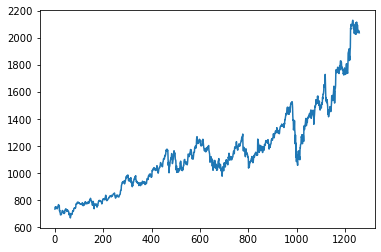

In [39]:
google['Adj Close'].plot()

In [40]:
features = ['Open' , 'High', 'Low','Volume']
feature_tf = google[features]
feature_tf

,Open,High,Low,Volume
0,736.789978,738.989990,732.500000,1301300
1,734.590027,747.250000,728.760010,1903800
2,750.099976,757.880005,748.739990,1782400
3,749.250000,750.849976,740.940002,1718800
4,738.599976,750.340027,737.000000,1576700
...,...,...,...,...
1255,2041.839966,2057.989990,2026.069946,1954800
1256,2051.699951,2072.302002,2039.219971,1367000
1257,2065.370117,2078.209961,2041.555054,1154000
1258,2044.810059,2058.870117,2010.729980,1418900


In [41]:
close_price = google['Adj Close']
close_price = pd.DataFrame(data=close_price.values.ravel(), columns=['Adj Close'],index=google['Date'])
close_price

,Adj Close
Date,
2016-03-28,733.530029
2016-03-29,744.770020
2016-03-30,750.530029
2016-03-31,744.950012
2016-04-01,749.909973
...,...
2021-03-22,2038.589966
2021-03-23,2052.959961
2021-03-24,2045.060059


In [42]:
scaller = MinMaxScaler()
X = scaller.fit_transform(feature_tf)
X = pd.DataFrame(data=X, columns=feature_tf.columns)
X

,Open,High,Low,Volume
0,0.045427,0.045049,0.048031,0.162878
1,0.043908,0.050629,0.045435,0.265691
2,0.054617,0.057809,0.059300,0.244975
3,0.054030,0.053061,0.053888,0.234122
4,0.046676,0.052716,0.051153,0.209873
...,...,...,...,...
1255,0.946536,0.936037,0.945672,0.274393
1256,0.953344,0.945705,0.954798,0.174090
1257,0.962783,0.949695,0.956418,0.137743
1258,0.948587,0.936631,0.935028,0.182946


In [43]:
timesplit = TimeSeriesSplit(n_splits=10)
for train_idx , test_idx in timesplit.split(X):
    X_train , X_test = X[:len(train_idx)],X[len(train_idx):len(train_idx)+len(test_idx)]
    y_train , y_test = close_price[:len(train_idx)].values.ravel() , close_price[len(train_idx):len(train_idx)+len(test_idx)].values.ravel()

In [44]:
X_train

,Open,High,Low,Volume
0,0.045427,0.045049,0.048031,0.162878
1,0.043908,0.050629,0.045435,0.265691
2,0.054617,0.057809,0.059300,0.244975
3,0.054030,0.053061,0.053888,0.234122
4,0.046676,0.052716,0.051153,0.209873
...,...,...,...,...
1141,0.555546,0.550170,0.544944,0.153339
1142,0.547750,0.538146,0.536208,0.238797
1143,0.548302,0.552358,0.556394,0.143510
1144,0.568747,0.570273,0.573298,0.185745


In [45]:
X_test

,Open,High,Low,Volume
1146,0.630221,0.619908,0.624475,0.214020
1147,0.626672,0.618344,0.615683,0.270042
1148,0.604963,0.609847,0.611866,0.203611
1149,0.617875,0.613917,0.624336,0.185642
1150,0.627963,0.618659,0.600049,0.215061
...,...,...,...,...
1255,0.946536,0.936037,0.945672,0.274393
1256,0.953344,0.945705,0.954798,0.174090
1257,0.962783,0.949695,0.956418,0.137743
1258,0.948587,0.936631,0.935028,0.182946


In [46]:
xtrain = np.array(X_train)
xtest = np.array(X_test)
X_train = xtrain.reshape(X_train.shape[0],1,X_train.shape[1])
X_test = xtest.reshape(X_test.shape[0],1,X_test.shape[1])

In [47]:
X_train.shape

(1146, 1, 4)

In [48]:
X_test.shape

(114, 1, 4)

In [49]:
lstm = Sequential()
lstm.add(LSTM(32,input_shape=(1, xtrain.shape[1]),activation='relu',return_sequences=False))
lstm.add(Dense(1))
lstm.compile(optimizer='adam',loss='mean_squared_error')

In [50]:
lstm.fit(X_train,y_train,batch_size=4,epochs=150,verbose=1)

Epoch 1/150
287/287 [==============================] - 2s 2ms/step - loss: 1212122.7500
Epoch 2/150
287/287 [==============================] - 1s 2ms/step - loss: 1184309.3750
Epoch 3/150
287/287 [==============================] - 0s 2ms/step - loss: 1119391.3750
Epoch 4/150
287/287 [==============================] - 0s 2ms/step - loss: 1030114.8750
Epoch 5/150
287/287 [==============================] - 0s 2ms/step - loss: 927363.5625
Epoch 6/150
287/287 [==============================] - 0s 2ms/step - loss: 817858.7500
Epoch 7/150
287/287 [==============================] - 0s 2ms/step - loss: 705945.8125
Epoch 8/150
287/287 [==============================] - 0s 2ms/step - loss: 595681.4375
Epoch 9/150
287/287 [==============================] - 0s 2ms/step - loss: 490568.2500
Epoch 10/150
287/287 [==============================] - 0s 2ms/step - loss: 393243.3438
Epoch 11/150
287/287 [==============================] - 1s 2ms/step - loss: 305651.3438
Epoch 12/150
287/287 [===============

287/287 [==============================] - 1s 2ms/step - loss: 100.1542
Epoch 97/150
287/287 [==============================] - 1s 2ms/step - loss: 99.6215
Epoch 98/150
287/287 [==============================] - 1s 2ms/step - loss: 98.1065
Epoch 99/150
287/287 [==============================] - 1s 2ms/step - loss: 99.6131
Epoch 100/150
287/287 [==============================] - 1s 2ms/step - loss: 99.8683
Epoch 101/150
287/287 [==============================] - 1s 2ms/step - loss: 99.6995
Epoch 102/150
287/287 [==============================] - 1s 2ms/step - loss: 100.0161
Epoch 103/150
287/287 [==============================] - 1s 2ms/step - loss: 99.8181
Epoch 104/150
287/287 [==============================] - 1s 2ms/step - loss: 99.8539
Epoch 105/150
287/287 [==============================] - 1s 2ms/step - loss: 99.9271
Epoch 106/150
287/287 [==============================] - 1s 2ms/step - loss: 100.0186
Epoch 107/150
287/287 [==============================] - 1s 2ms/step - loss: 99

In [51]:
predict = lstm.predict(X_test)

4/4 [==============================] - 0s 2ms/step


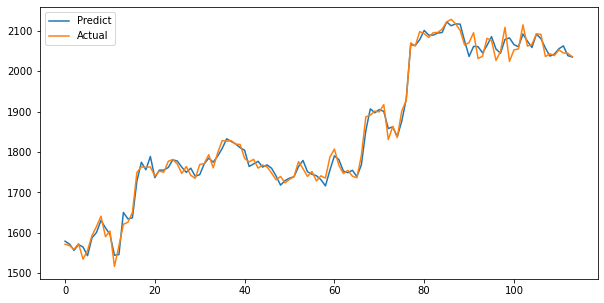

In [52]:
plt.figure(figsize=(10,5))
plt.plot(predict,label='Predict')
plt.plot(y_test,label='Actual')
plt.legend()
plt.show()

In [53]:
r2_score(y_test,predict)

0.9916319381525038

In [54]:
mean_squared_error(y_test,predict)

250.66885639844747

# Amazon

In [72]:
amazon = pd.read_csv('Amazon_Historical_StockPrice2.csv')
amazon.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-03-28,584.400024,584.750000,575.559998,579.869995,579.869995,3121500
1,2016-03-29,580.150024,595.849976,576.500000,593.859985,593.859985,4392600
2,2016-03-30,596.710022,603.239990,595.000000,598.690002,598.690002,3890500
3,2016-03-31,599.280029,600.750000,592.210022,593.640015,593.640015,2681800
4,2016-04-01,590.489990,599.030029,588.299988,598.500000,598.500000,2917400


<AxesSubplot:>

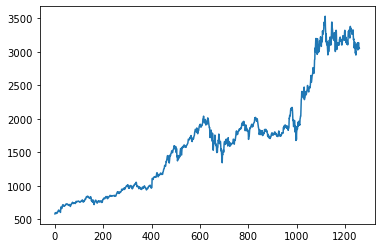

In [73]:
amazon['Adj Close'].plot()

In [74]:
features = ['Open' , 'High', 'Low','Volume']
feature_tf = amazon[features]
feature_tf

,Open,High,Low,Volume
0,584.400024,584.750000,575.559998,3121500
1,580.150024,595.849976,576.500000,4392600
2,596.710022,603.239990,595.000000,3890500
3,599.280029,600.750000,592.210022,2681800
4,590.489990,599.030029,588.299988,2917400
...,...,...,...,...
1255,3067.850098,3126.580078,3060.050049,2902200
1256,3127.000000,3182.000000,3120.850098,3817300
1257,3151.040039,3160.310059,3085.149902,2959000
1258,3072.989990,3109.780029,3037.139893,3563500


In [75]:
close_price = amazon['Adj Close']
close_price = pd.DataFrame(data=close_price.values.ravel(), columns=['Adj Close'],index=amazon['Date'])
close_price

,Adj Close
Date,
2016-03-28,579.869995
2016-03-29,593.859985
2016-03-30,598.690002
2016-03-31,593.640015
2016-04-01,598.500000
...,...
2021-03-22,3110.870117
2021-03-23,3137.500000
2021-03-24,3087.070068


In [76]:
scaller = MinMaxScaler()
X = scaller.fit_transform(feature_tf)
X = pd.DataFrame(data=X, columns=feature_tf.columns)
X

,Open,High,Low,Volume
0,0.001432,0.000000,0.000000,0.142836
1,0.000000,0.003741,0.000323,0.223882
2,0.005582,0.006231,0.006678,0.191868
3,0.006448,0.005392,0.005719,0.114801
4,0.003485,0.004812,0.004376,0.129823
...,...,...,...,...
1255,0.838499,0.856556,0.853445,0.128854
1256,0.858436,0.875232,0.874331,0.187201
1257,0.866539,0.867923,0.862067,0.132475
1258,0.840231,0.850895,0.845575,0.171018


In [77]:
timesplit = TimeSeriesSplit(n_splits=10)
for train_idx , test_idx in timesplit.split(X):
    X_train , X_test = X[:len(train_idx)],X[len(train_idx):len(train_idx)+len(test_idx)]
    y_train , y_test = close_price[:len(train_idx)].values.ravel() , close_price[len(train_idx):len(train_idx)+len(test_idx)].values.ravel()

In [78]:
xtrain = np.array(X_train)
xtest = np.array(X_test)
X_train = xtrain.reshape(X_train.shape[0],1,X_train.shape[1])
X_test = xtest.reshape(X_test.shape[0],1,X_test.shape[1])

In [79]:
lstm2 = Sequential()
lstm2.add(LSTM(32,input_shape=(1, xtrain.shape[1]),activation='relu',return_sequences=False))
lstm2.add(Dense(1))
lstm2.compile(optimizer='adam',loss='mean_absolute_error')

In [ ]:
lstm2.fit(X_train,y_train,batch_size=8,epochs=150,verbose=1)

Epoch 1/150
144/144 [==============================] - 2s 2ms/step - loss: 1526.5020
Epoch 2/150
144/144 [==============================] - 0s 2ms/step - loss: 1524.3379
Epoch 3/150
144/144 [==============================] - 0s 2ms/step - loss: 1518.3517
Epoch 4/150
144/144 [==============================] - 0s 2ms/step - loss: 1507.9647
Epoch 5/150
144/144 [==============================] - 0s 2ms/step - loss: 1493.6029
Epoch 6/150
144/144 [==============================] - 0s 2ms/step - loss: 1475.9133
Epoch 7/150
144/144 [==============================] - 0s 2ms/step - loss: 1455.4260
Epoch 8/150
144/144 [==============================] - 0s 2ms/step - loss: 1432.4163
Epoch 9/150
144/144 [==============================] - 0s 2ms/step - loss: 1407.1052
Epoch 10/150
144/144 [==============================] - 0s 2ms/step - loss: 1379.6646
Epoch 11/150
144/144 [==============================] - 0s 2ms/step - loss: 1350.2826
Epoch 12/150
144/144 [==============================] - 0s 2ms/

In [ ]:
predict2 = lstm2.predict(X_test)

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(predict2,label='Predict')
plt.plot(y_test,label='Actual')
plt.legend()
plt.show()

In [ ]:
r2_score(y_test,predict2)